In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("/kaggle/input/weather-prediction/seattle-weather.csv")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [4]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [5]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0      2012-01-01
1      2012-01-02
2      2012-01-03
3      2012-01-04
4      2012-01-05
          ...    
1456   2015-12-27
1457   2015-12-28
1458   2015-12-29
1459   2015-12-30
1460   2015-12-31
Name: date, Length: 1461, dtype: datetime64[ns]

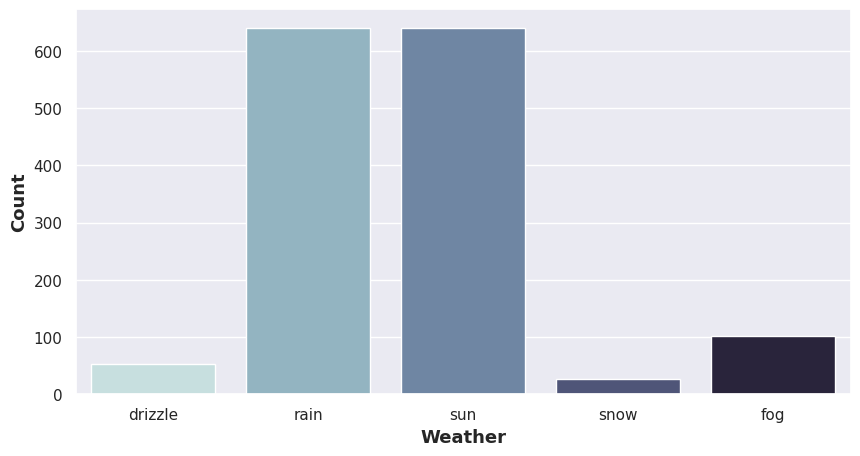

In [7]:
plt.figure(figsize= (10, 5))
sns.set_theme()
sns.countplot(x= 'weather', data= df, palette= "ch: start= .2, rot= -.3")
plt.xlabel("Weather", fontweight= 'bold', size= 13)
plt.ylabel("Count", fontweight= 'bold', size=13)
plt.show()

In [8]:
px.line(data_frame= df, x= 'date', y= 'temp_max', title= 'Variation of Maximum Temperature')

In [9]:
px.line(data_frame= df, x= 'date', y= 'temp_min', title= 'Variation of Minimum Temperature')

/tmp/ipykernel_13/1519514762.py:2: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x500 with 0 Axes>

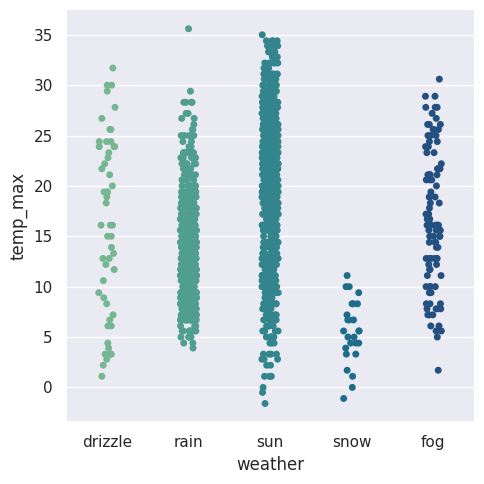

In [10]:
plt.figure(figsize= (10, 5))
sns.catplot(x= 'weather', y= 'temp_max', data= df, palette= 'crest')
plt.show()

/tmp/ipykernel_13/2475675325.py:2: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x500 with 0 Axes>

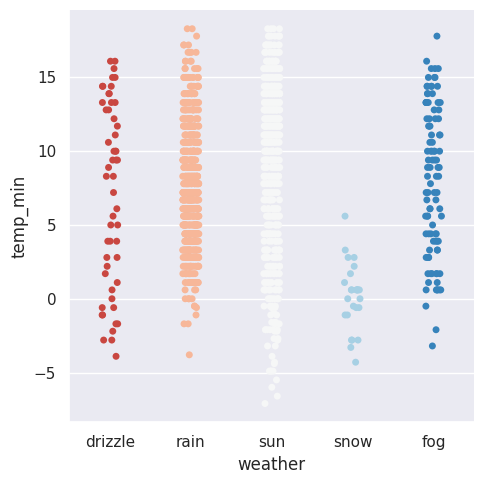

In [11]:
plt.figure(figsize= (10, 5))
sns.catplot(x= 'weather', y= 'temp_min', data= df, palette= 'RdBu')
plt.show()

In [12]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['weather'] = le.fit_transform(df['weather'])
df['weather'].unique()

array([0, 2, 4, 3, 1])

In [13]:
df = df.drop('date', axis=1)

In [14]:
x = df.drop('weather', axis=1)
y = df['weather']

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state = 42)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 4)
(366, 4)
(1095,)
(366,)


In [17]:
# Scaling technique
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
le = LogisticRegression(random_state= 42)
le.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [19]:
y_pred = le.predict(x_test)

Accuracy score: 0.7841530054644809


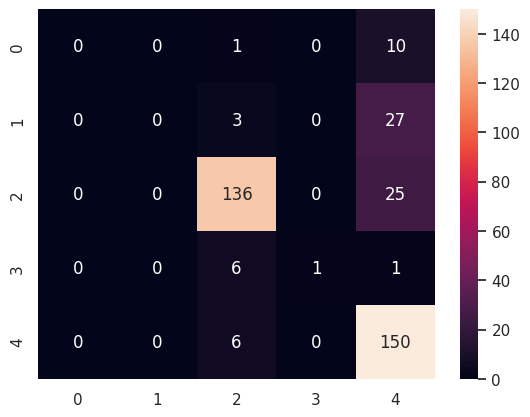

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt= '.3g')
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc}")
plt.show()

In [21]:
# Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

Accuracy score: 0.8360655737704918


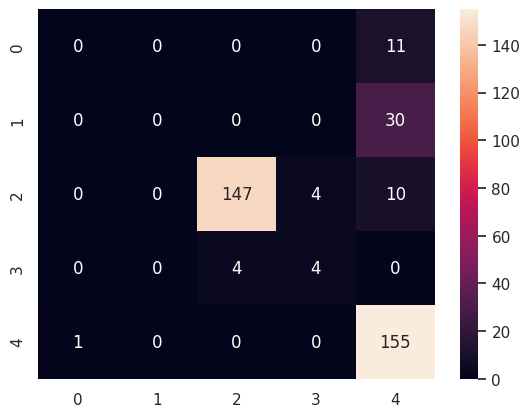

In [22]:
y_pred = nb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt= '.3g')
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc}")

In [23]:
# Support Vector Classifier

from sklearn.svm import SVC
svc = SVC(kernel= 'linear', random_state= 42)
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

0.7814207650273224


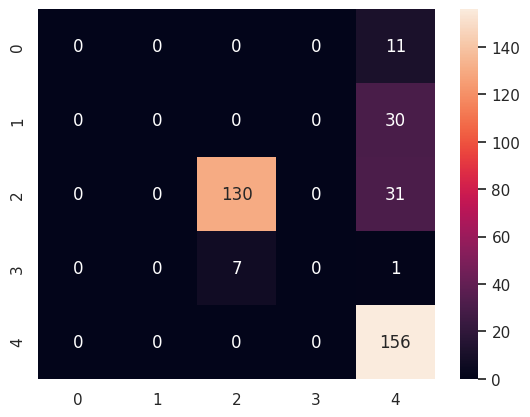

In [24]:
y_pred = svc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt= '.3g')
print(accuracy_score(y_test, y_pred))